In [1]:
import numpy as np
import matplotlib.pyplot as plt
import datetime

%matplotlib inline

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets.cifar10 import load_data

In [3]:
(X_train,y_train),(X_val,y_val) = load_data()

In [4]:
X_train = X_train/255.0
X_val = X_val/255.0

In [5]:
%load_ext tensorboard

In [6]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_val = to_categorical(y_val)

In [7]:
print("Total no. of train data:{}".format(len(X_train)))
print("Total no. of validation data:{}".format(len(X_val)))

Total no. of train data:50000
Total no. of validation data:10000


In [8]:
X_train[0].shape[:-1]

(32, 32)

In [9]:
X_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [10]:
X_train.shape

(50000, 32, 32, 3)

In [11]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

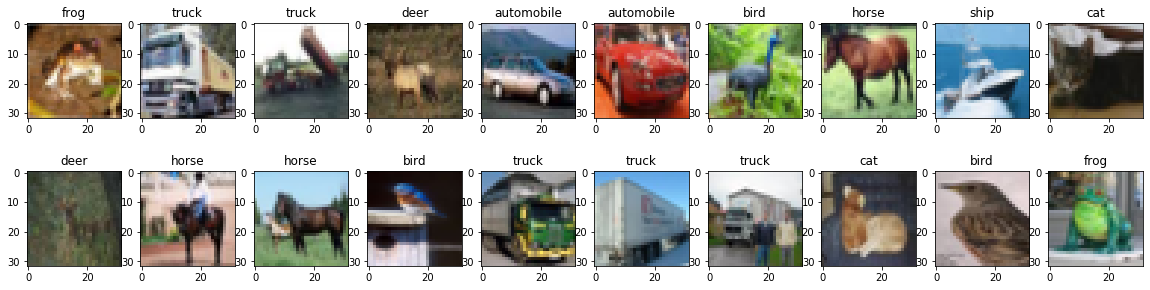

In [12]:
batch_size = 20
fig = plt.figure(figsize=(20,5))
for i in range(batch_size):
    ax = fig.add_subplot(2,batch_size/2,i+1)
    ax.imshow(X_train[i],cmap='gray')
    ax.set_title(classes[np.argmax(y_train[i])])

In [29]:
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [30]:
datagen = ImageDataGenerator(rotation_range=15,
                            horizontal_flip=True,
                            width_shift_range=0.1,
                            height_shift_range=0.1,
                            shear_range=0.2,
                            zoom_range=0.2)

datagen.fit(X_train)

In [15]:
X_train.shape

(50000, 32, 32, 3)

In [16]:
# augumented Images
for x_bat,y_bat in datagen.flow(X_train,y_train,batch_size=10):
    for i in range(10):
        ax = fig.add_subplot(2,batch_size/2,i+1)
        ax.imshow(x_bat[i].astype(np.uint8),cmap='gray')
        ax.set_title(classes[np.argmax(y_bat[i])])

/home/sid/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


KeyboardInterrupt: 

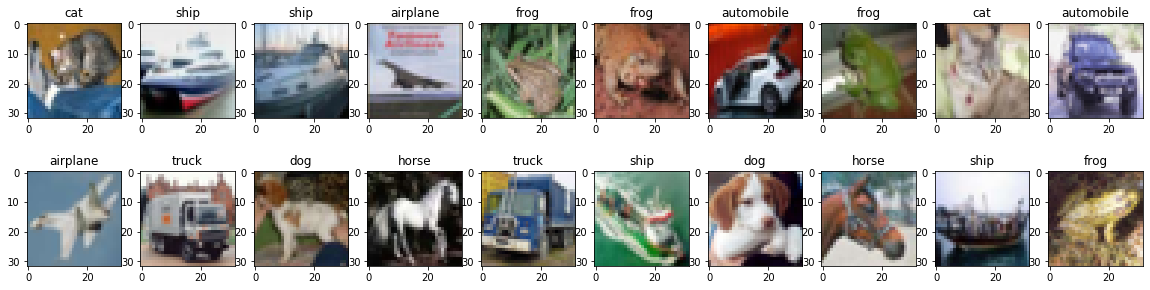

In [13]:
batch_size = 20
fig = plt.figure(figsize=(20,5))
for i in range(batch_size):
    ax = fig.add_subplot(2,batch_size/2,i+1)
    ax.imshow(X_val[i],cmap='gray')
    ax.set_title(classes[np.argmax(y_val[i])])

### Evaluation Metric

In [18]:
def true_positive(y_pred,y_true):
    count = 0
    for yp,yt in zip(y_pred,y_true):
        if yp==yt==1:
            count+=1
    return count

def true_negative(y_pred,y_true):
    count=0
    for yp,yt in zip(y_pred,y_true):
        if yp==yt==0:
            count+=1
    return count

def false_positive(y_pred,y_true):
    count=0
    for yp,yt in zip(y_pred,y_true):
        if yp==1 and yt==0:
            count+=1
    return count

def false_negative(y_pred,y_true):
    count=0
    for yp,yt in zip(y_pred,y_true):
        if yp==0 and yt==1:
            count+=1
    return count

def accuracy(y_pred,y_true):
    TP = true_positive(y_pred,y_true)
    TN = true_negative(y_pred,y_true)
    FN = false_negative(y_pred,y_true)
    FP = false_positive(y_pred,y_true)
    
    return (TP+TN)/(TP+TN+FP+FN)

### Model

### Using Simple Neural Network

In [14]:
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization, Dropout
from tensorflow.keras import Model, Input

In [20]:
def create_model():
    inp = Input(shape=(32,32,3))
    
    flat = Flatten()(inp)
    
    dense_1 = Dense(512,activation='relu')(flat)

    dense_2 = Dense(512,activation='relu')(dense_1)
    
    dense_3 = Dense(256,activation='relu')(dense_2)
    
    dense_4 = Dense(124,activation='relu')(dense_3)
    
    dense_5 = Dense(64,activation='relu')(dense_4)
    
    out = Dense(10,activation='softmax')(dense_5)
    
    model = Model(inputs = inp, outputs = out)
    
    return model

In [21]:
model = create_model()

In [22]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               1573376   
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 124)               31868     
_________________________________________________________________
dense_4 (Dense)              (None, 64)               

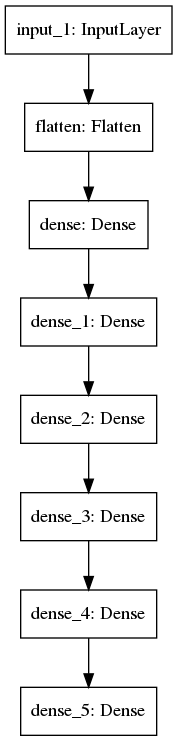

In [23]:
tf.keras.utils.plot_model(model, to_file='model_combined.png')

In [23]:
from tensorflow.keras.optimizers import Adam

In [24]:
opt = Adam(lr=0.001,decay=0, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

In [38]:
model.compile(optimizer = opt, loss='categorical_crossentropy',metrics=['accuracy'])

path = "log/fits2/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=path,histogram_freq=1)

In [39]:
model.fit(X_train,y_train,epochs=20, validation_data=(X_val,y_val),callbacks=[tensorboard_callback],steps_per_epoch=5000)

Epoch 1/20
5000/5000 [==============================] - 50s 10ms/step - loss: 1.4816 - accuracy: 0.4693 - val_loss: 1.5409 - val_accuracy: 0.4556
Epoch 2/20
5000/5000 [==============================] - 47s 9ms/step - loss: 1.4751 - accuracy: 0.4716 - val_loss: 1.5712 - val_accuracy: 0.4480
Epoch 3/20
5000/5000 [==============================] - 50s 10ms/step - loss: 1.4663 - accuracy: 0.4713 - val_loss: 1.5740 - val_accuracy: 0.4486
Epoch 4/20
5000/5000 [==============================] - 49s 10ms/step - loss: 1.4622 - accuracy: 0.4754 - val_loss: 1.5520 - val_accuracy: 0.4517
Epoch 5/20
5000/5000 [==============================] - 45s 9ms/step - loss: 1.4604 - accuracy: 0.4770 - val_loss: 1.5417 - val_accuracy: 0.4569
Epoch 6/20
5000/5000 [==============================] - 46s 9ms/step - loss: 1.4478 - accuracy: 0.4801 - val_loss: 1.5661 - val_accuracy: 0.4505
Epoch 7/20
5000/5000 [==============================] - 45s 9ms/step - loss: 1.4470 - accuracy: 0.4823 - val_loss: 1.5934 - val

In [26]:
%tensorboard --logdir log/fits2 #for showing tensorboard

In [15]:
import pandas as pd
test_data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/cifar_image_flattened_pixels.csv")

In [16]:
test_data = test_data.to_numpy()

In [17]:
test_data=test_data.reshape(-1,32,32,3)

In [30]:
prediction=model.predict(test_data)

In [31]:
prediction.shape

(2000, 10)

In [32]:
for i in range(2000):
    print(np.argmax(prediction[i]))

0
5
5
9
5
9
5
7
5
5
8
8
5
1
5
0
0
0
5
5
5
8
0
0
5
0
8
0
0
5
5
5
7
5
2
0
5
7
0
7
0
2
5
1
8
5
0
0
7
2
1
8
7
5
8
9
1
5
1
0
0
1
7
5
1
1
0
8
5
1
5
0
9
0
0
0
5
5
7
0
0
5
8
9
0
0
0
0
8
4
0
5
0
0
0
0
0
0
0
5
0
0
5
0
0
9
5
9
5
0
0
0
8
0
0
5
5
5
9
0
0
8
1
0
5
5
0
8
1
0
0
0
0
0
5
7
9
0
1
5
5
9
0
5
5
5
1
8
1
0
0
5
5
8
1
5
0
0
0
0
5
0
1
0
0
0
9
1
0
1
0
8
9
0
1
0
0
0
0
7
0
5
0
5
0
5
0
9
0
0
5
8
0
0
2
5
0
0
0
7
1
5
5
3
8
0
1
0
0
0
5
0
1
5
0
8
5
5
1
5
5
2
5
5
5
5
1
0
5
5
8
7
0
1
8
8
0
8
0
0
9
1
0
5
0
7
5
0
5
1
1
1
0
9
5
5
5
8
0
0
7
0
1
9
8
9
0
1
0
7
8
8
0
9
5
5
8
6
1
9
5
5
0
0
1
0
8
5
1
5
5
2
0
0
8
5
1
0
0
5
5
0
5
8
0
0
0
9
5
1
0
5
0
8
8
5
0
5
0
0
5
8
1
1
7
1
8
1
8
0
0
5
8
0
1
1
5
5
5
5
5
8
1
0
5
5
5
5
0
0
0
5
1
0
0
0
0
1
9
0
0
0
1
1
1
7
5
8
9
0
0
5
1
0
0
0
5
9
0
5
0
9
5
0
0
5
0
1
7
8
5
7
5
5
8
5
0
0
2
7
8
5
5
8
9
0
8
9
5
5
1
5
0
0
9
8
5
5
0
0
1
0
0
5
9
0
1
8
5
5
5
0
9
5
0
0
0
0
5
1
2
8
5
0
5
0
0
1
0
5
0
5
0
5
5
8
1
5
1
1
5
0
8
0
5
5
8
0
8
8
0
7
0
9
5
9
1
9
5
5
5
5
0
1
0
9
5
5
1
9
5
0
0
5
5
0
0
5
0
0


In [33]:
np.argmax(prediction[2])

5

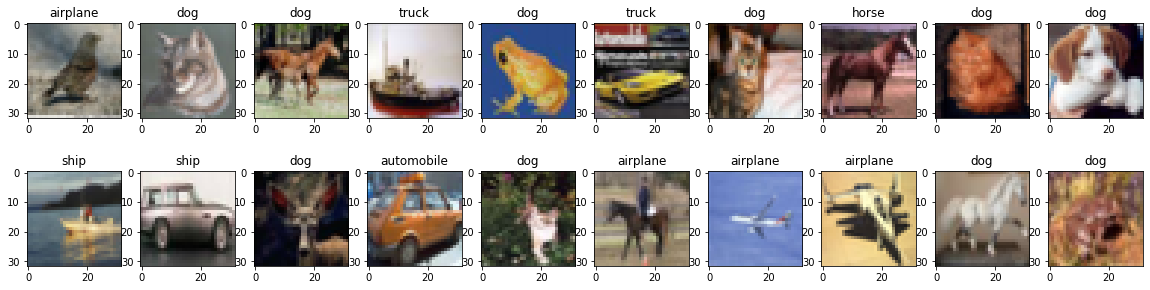

In [34]:
batch_size = 20
fig = plt.figure(figsize=(20,5))
for i in range(batch_size):
    ax = fig.add_subplot(2,batch_size/2,i+1)
    ax.imshow(test_data[i],cmap='gray')
    ax.set_title(classes[np.argmax(prediction[i])])

### Using CNN

In [31]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from keras.regularizers import l2

In [32]:
reg=l2(1e-4)

In [36]:
def create_cnn_model():
    inp = Input(shape=(32,32,3))
    
    conv_1 = Conv2D(256, (3, 3), activation='relu', kernel_regularizer=reg,input_shape=(32,32,3),padding='same')(inp)
    pool_1 = MaxPooling2D(pool_size=(2, 2))(conv_1)
    batch_1 = BatchNormalization()(pool_1)
    drop_1 = Dropout(rate=0.2)(batch_1)
    
    conv_2 = Conv2D(256, (3, 3), activation='relu',kernel_regularizer=reg,padding='same')(drop_1)
    batch_2 = BatchNormalization()(conv_2)
    
    conv_3 = Conv2D(128, (3, 3), activation='relu',kernel_regularizer=reg,padding='same')(batch_2)
    pool_3 = MaxPooling2D(pool_size=(2, 2))(conv_3)
    batch_3 = BatchNormalization()(pool_3)
    drop_3 = Dropout(rate=0.2)(batch_3)
    
    conv_4 = Conv2D(128, (3, 3), activation='relu',kernel_regularizer=reg,padding='same')(drop_3)
    batch_4 = BatchNormalization()(conv_4)
    
    conv_5 = Conv2D(64, (3, 3), activation='relu',kernel_regularizer=reg,padding='same')(batch_4)
    pool_4 = MaxPooling2D(pool_size=(2, 2))(conv_5)
    batch_5 = BatchNormalization()(pool_4)
    drop_4 = Dropout(rate=0.2)(batch_5)
    
    
    flat = Flatten()(drop_4)
    
    dense_1 = Dense(124,activation='relu',kernel_regularizer=reg)(flat)
    batch_dense = BatchNormalization()(dense_1)
    drop_dense = Dropout(rate=0.4)(batch_dense)

    out = Dense(10,activation='softmax')(drop_dense)
    
    model = Model(inputs = inp, outputs = out)
    
    return model

In [37]:
model_cnn =create_cnn_model()

In [38]:
model_cnn.summary()

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 32, 32, 256)       7168      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 256)       0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 16, 16, 256)       1024      
_________________________________________________________________
dropout_7 (Dropout)          (None, 16, 16, 256)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 16, 16, 256)       590080    
_________________________________________________________________
batch_normalization_10 (Batc (None, 16, 16, 256)      

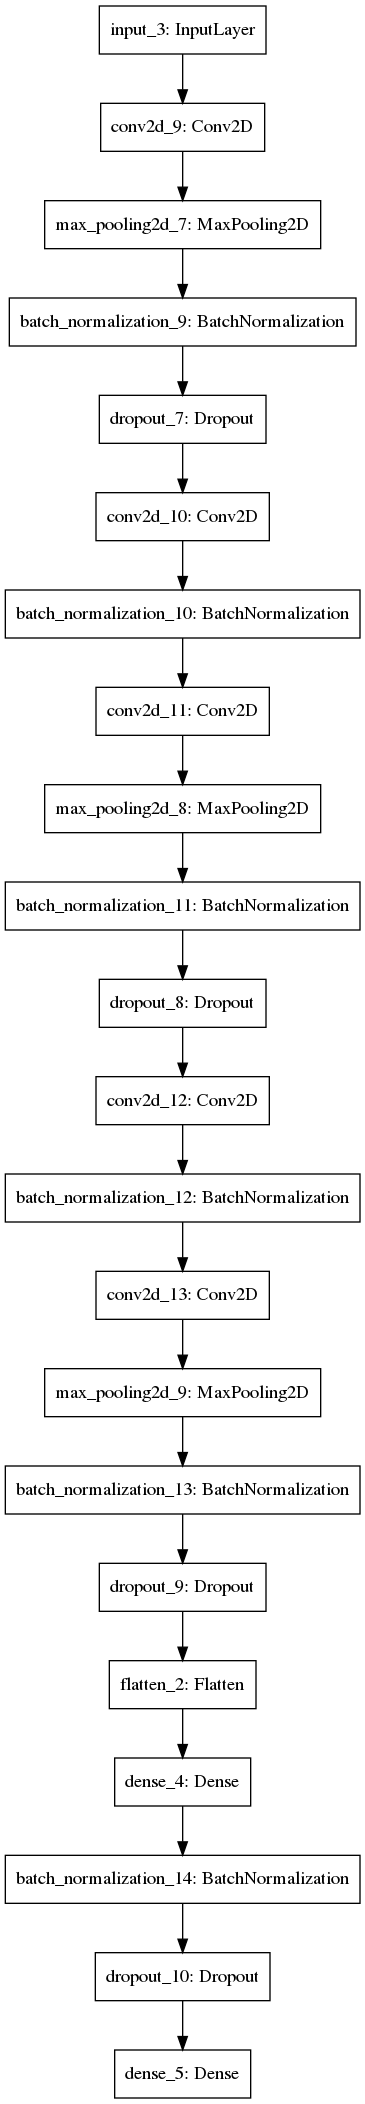

In [39]:
tf.keras.utils.plot_model(model_cnn, to_file='model_cnn.png')

In [40]:
model_cnn.compile(optimizer = opt, loss='categorical_crossentropy',metrics=['accuracy'])

path = "log/fits2/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=path,histogram_freq=1)

In [41]:
model_cnn.fit(X_train,y_train,epochs=10, validation_data=(X_val,y_val),callbacks=[tensorboard_callback])

Epoch 1/10
1563/1563 [==============================] - 1114s 713ms/step - loss: 1.7159 - accuracy: 0.4554 - val_loss: 1.6072 - val_accuracy: 0.4880
Epoch 2/10
 950/1563 [=================>............] - ETA: 6:48 - loss: 1.3245 - accuracy: 0.5953

KeyboardInterrupt: 

In [27]:
prediction_cnn=model_cnn.predict(test_data)

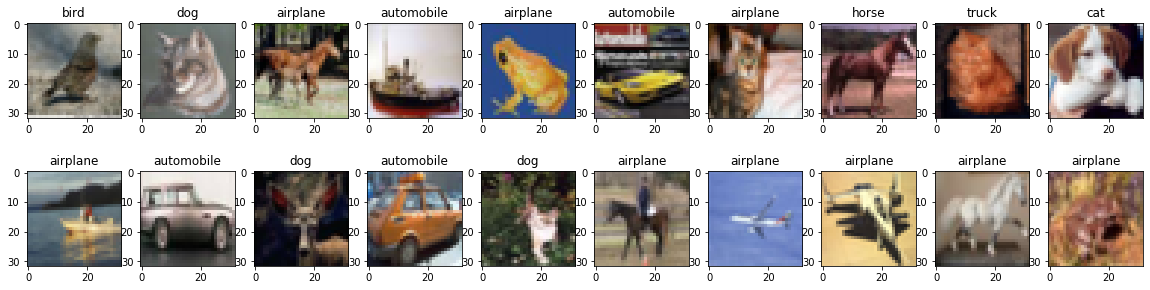

In [28]:
batch_size = 20
fig = plt.figure(figsize=(20,5))
for i in range(batch_size):
    ax = fig.add_subplot(2,batch_size/2,i+1)
    ax.imshow(test_data[i],cmap='gray')
    ax.set_title(classes[np.argmax(prediction_cnn[i])])

In [ ]:
model.add(Conv2D(num_filters, (3, 3), activation=ac, kernel_regularizer=reg, input_shape=(img_rows, img_cols, channels),padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(num_filters, (3, 3), activation=ac,kernel_regularizer=reg,padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2, 2)))   # reduces to 16x16x3xnum_filters
model.add(Dropout(drop_conv))

model.add(Conv2D(2*num_filters, (3, 3), activation=ac,kernel_regularizer=reg,padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(2*num_filters, (3, 3), activation=ac,kernel_regularizer=reg,padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2, 2)))   # reduces to 8x8x3x(2*num_filters)
model.add(Dropout(drop_conv))

model.add(Conv2D(4*num_filters, (3, 3), activation=ac,kernel_regularizer=reg,padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(4*num_filters, (3, 3), activation=ac,kernel_regularizer=reg,padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2, 2)))   # reduces to 4x4x3x(4*num_filters)
model.add(Dropout(drop_conv))

model.add(Flatten())
model.add(Dense(512, activation=ac,kernel_regularizer=reg))
model.add(BatchNormalization())
model.add(Dropout(drop_dense))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer=opt)